## Performance de uma carteira de ativos

###### Importando as bibliotecas

In [2]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import yfinance as yf

###### Importando os dados

In [3]:
carteira = pd.read_excel('carteira.xlsx')
display(carteira)

,Ativos,Tipo,Qtde
0,BOVA11,ETF,100
1,SMAL11,ETF,100
2,MGLU3,Ação,1000
3,BBDC4,Ação,100
4,ITUB4,Ação,100
5,ENEV3,Ação,300
6,MOVI3,Ação,100
7,BPAC11,Ação,100
8,GNDI3,Ação,100
9,NTCO3,Ação,100


###### Criando nosso Dataframe de Cotações dos ativos da carteira

In [4]:
cotacoes_carteira = pd.DataFrame()

for ativo in carteira['Ativos']:
  cotacoes_carteira[ativo] = yf.download('{}.SA'.format(ativo), start='2020-01-01', end='2020-11-10', progress=False)['Adj Close']
  
display(cotacoes_carteira)


1 Failed download:
- GNDI3.SA: No timezone found, symbol may be delisted


,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,GNDI3,NTCO3,BCRI11,VILG11,KNRI11,XPLG11
Date,,,,,,,,,,,,,,
2020-01-02,114.239998,139.500000,12.029735,23.282961,32.820751,10.9650,17.084026,17.313044,NaN,38.093487,100.534286,129.015015,173.117020,NaN
2020-01-03,113.800003,140.899994,11.922436,23.294737,32.475563,11.0675,17.537739,17.363287,NaN,40.747009,101.737297,127.283264,173.117020,NaN
2020-01-06,112.589996,139.100006,11.932189,22.878651,31.992273,11.3500,17.602499,17.338163,NaN,39.882378,100.940598,128.634018,171.711914,NaN
2020-01-07,112.239998,139.399994,11.898048,22.481190,31.250055,11.2650,17.567362,17.407337,NaN,40.528366,101.076057,124.538460,172.379791,NaN
2020-01-08,111.949997,138.199997,12.263844,22.133411,30.740879,11.2125,17.655197,17.253067,NaN,40.737072,99.243652,120.763222,162.622437,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-03,92.260002,109.980003,24.945910,14.382790,21.218843,13.8050,15.907248,16.519493,NaN,46.143505,85.636200,108.407211,137.314026,109.605774
2020-11-04,94.160004,112.000000,26.143793,14.278520,22.066181,14.4000,16.284948,17.416510,NaN,47.375851,85.644180,109.939819,137.366058,109.734718
2020-11-05,96.949997,115.900002,27.401571,14.499461,22.586948,14.6775,17.233580,18.186047,NaN,49.969746,85.644180,111.160698,137.192596,109.992577


###### Validando as informações geradas

In [5]:
cotacoes_carteira.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 214 entries, 2020-01-02 to 2020-11-09
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BOVA11  214 non-null    float64
 1   SMAL11  214 non-null    float64
 2   MGLU3   214 non-null    float64
 3   BBDC4   214 non-null    float64
 4   ITUB4   214 non-null    float64
 5   ENEV3   214 non-null    float64
 6   MOVI3   214 non-null    float64
 7   BPAC11  214 non-null    float64
 8   GNDI3   0 non-null      float64
 9   NTCO3   214 non-null    float64
 10  BCRI11  214 non-null    float64
 11  VILG11  214 non-null    float64
 12  KNRI11  214 non-null    float64
 13  XPLG11  109 non-null    float64
dtypes: float64(14)
memory usage: 25.1 KB


###### Ajustando os dados validados que estão como nulos

In [6]:
df_media = cotacoes_carteira.mean()
# cotacoes_carteira = cotacoes_carteira.fillna(df_media)
cotacoes_carteira = cotacoes_carteira.ffill()

display(cotacoes_carteira)

,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,GNDI3,NTCO3,BCRI11,VILG11,KNRI11,XPLG11
Date,,,,,,,,,,,,,,
2020-01-02,114.239998,139.500000,12.029735,23.282961,32.820751,10.9650,17.084026,17.313044,NaN,38.093487,100.534286,129.015015,173.117020,NaN
2020-01-03,113.800003,140.899994,11.922436,23.294737,32.475563,11.0675,17.537739,17.363287,NaN,40.747009,101.737297,127.283264,173.117020,NaN
2020-01-06,112.589996,139.100006,11.932189,22.878651,31.992273,11.3500,17.602499,17.338163,NaN,39.882378,100.940598,128.634018,171.711914,NaN
2020-01-07,112.239998,139.399994,11.898048,22.481190,31.250055,11.2650,17.567362,17.407337,NaN,40.528366,101.076057,124.538460,172.379791,NaN
2020-01-08,111.949997,138.199997,12.263844,22.133411,30.740879,11.2125,17.655197,17.253067,NaN,40.737072,99.243652,120.763222,162.622437,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-03,92.260002,109.980003,24.945910,14.382790,21.218843,13.8050,15.907248,16.519493,NaN,46.143505,85.636200,108.407211,137.314026,109.605774
2020-11-04,94.160004,112.000000,26.143793,14.278520,22.066181,14.4000,16.284948,17.416510,NaN,47.375851,85.644180,109.939819,137.366058,109.734718
2020-11-05,96.949997,115.900002,27.401571,14.499461,22.586948,14.6775,17.233580,18.186047,NaN,49.969746,85.644180,111.160698,137.192596,109.992577


###### Analisando a performance da carteira de forma individual para normalizar os dados

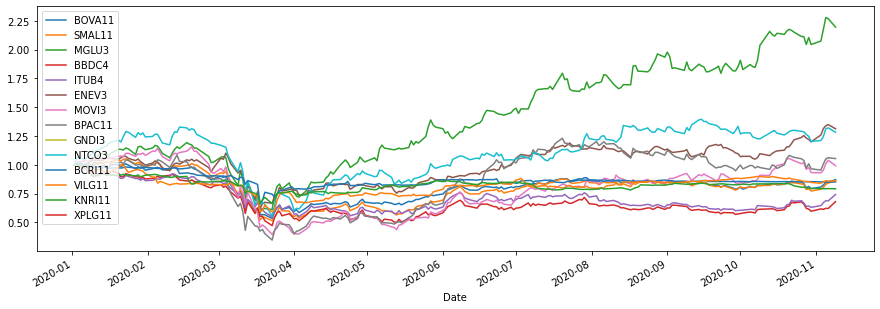

In [7]:
carteira_norm = cotacoes_carteira / cotacoes_carteira.iloc[0]
carteira_norm.plot(figsize=(15,5))
plt.legend(loc='upper left')

###### Buscando o Ibovespa para comparação

In [8]:
cotacoes_ibov = yf.download('^BVSP', start='2020-01-01', end='2020-11-10', progress=False)
display(cotacoes_ibov)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,115652.0,118573.0,115649.0,118573.0,118573.0,5162700
2020-01-03,118564.0,118792.0,117341.0,117707.0,117707.0,6834500
2020-01-06,117707.0,117707.0,116269.0,116878.0,116878.0,6570000
2020-01-07,116872.0,117076.0,115965.0,116662.0,116662.0,4854100
2020-01-08,116667.0,117335.0,115693.0,116247.0,116247.0,5910500
...,...,...,...,...,...,...
2020-11-03,93968.0,96250.0,93968.0,95587.0,95587.0,10191800
2020-11-04,95992.0,98296.0,95987.0,97811.0,97811.0,10704600
2020-11-05,97873.0,100922.0,97872.0,100774.0,100774.0,10455300


###### Criando um Dataframe da Carteira com as quantidades de ações

In [9]:
valor_investido = pd.DataFrame()

for ativo in carteira['Ativos']:
  valor_investido[ativo] = cotacoes_carteira[ativo] * carteira.loc[carteira['Ativos'] == ativo, 'Qtde'].values[0]

# Remover GNDI3 pois não tem cotação
valor_investido = valor_investido.drop('GNDI3', axis=1)

display(valor_investido)

,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,NTCO3,BCRI11,VILG11,KNRI11,XPLG11
Date,,,,,,,,,,,,,
2020-01-02,11423.999786,13950.000000,12029.734612,2328.296089,3282.075119,3289.500046,1708.402634,1731.304359,3809.348679,10053.428650,12901.501465,17311.701965,NaN
2020-01-03,11380.000305,14089.999390,11922.435760,2329.473686,3247.556305,3320.250034,1753.773880,1736.328697,4074.700928,10173.729706,12728.326416,17311.701965,NaN
2020-01-06,11258.999634,13910.000610,11932.188988,2287.865067,3199.227333,3405.000114,1760.249901,1733.816338,3988.237762,10094.059753,12863.401794,17171.191406,NaN
2020-01-07,11223.999786,13939.999390,11898.048401,2248.118973,3125.005531,3379.500103,1756.736183,1740.733719,4052.836609,10107.605743,12453.845978,17237.979126,NaN
2020-01-08,11194.999695,13819.999695,12263.843536,2213.341141,3074.087906,3363.749886,1765.519714,1725.306702,4073.707199,9924.365234,12076.322174,16262.243652,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-03,9226.000214,10998.000336,24945.909500,1438.278961,2121.884346,4141.500092,1590.724754,1651.949310,4614.350510,8563.619995,10840.721130,13731.402588,10960.577393
2020-11-04,9416.000366,11200.000000,26143.793106,1427.851963,2206.618118,4319.999886,1628.494835,1741.650963,4737.585068,8564.418030,10993.981934,13736.605835,10973.471832
2020-11-05,9694.999695,11590.000153,27401.571274,1449.946117,2258.694839,4403.249931,1723.357964,1818.604660,4996.974564,8564.418030,11116.069794,13719.259644,10999.257660


###### Carteira x IBOV

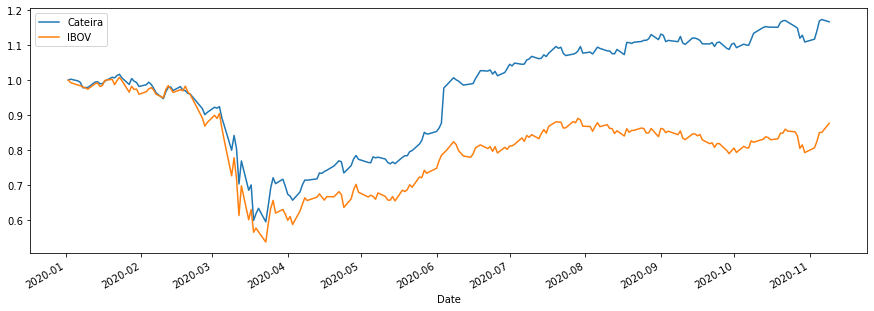

In [10]:
valor_investido['Total'] = valor_investido.sum(axis=1)

valor_investido_norm = valor_investido / valor_investido.iloc[0]
cotacoes_ibov_norm = cotacoes_ibov / cotacoes_ibov.iloc[0]

valor_investido_norm['Total'].plot(figsize=(15,5), label='Cateira')
cotacoes_ibov_norm['Adj Close'].plot(figsize=(15,5), label='IBOV')
plt.legend()
plt.show()

In [11]:
retorno_carteira = valor_investido['Total'][-1] / valor_investido['Total'][0]
retorno_ibov = cotacoes_ibov['Adj Close'][-1] / cotacoes_ibov['Adj Close'][0]
print('Retorno carteira: {:.2f}%'.format(retorno_carteira))
print('Retorno IBOV: {:.2f}%'.format(retorno_ibov))

Retorno carteira: 1.17%
Retorno IBOV: 0.88%


###### Correlação da Carteira com o IBOV

In [12]:
correlacao = valor_investido['Total'].corr(cotacoes_ibov['Adj Close'])
print('Correlação: {:.2f}%'.format(correlacao))

Correlação: 0.71%
